# CapsNets on Fashion Mnist dataset

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [12]:
(X_train, y_train), (X_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0
X_train = tf.cast(X_train, dtype=tf.float32)
X_train = tf.expand_dims(X_train, axis=-1)

X_test = X_test / 255.0
X_test = tf.cast(X_test, dtype=tf.float32)
X_test = tf.expand_dims(X_test, axis=-1)

# Reducing the size of the samples for faster training
X_train = X_train[:1024]
y_train = y_train[:1024]

X_test = X_test[:512]
y_test = y_test[:512]

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

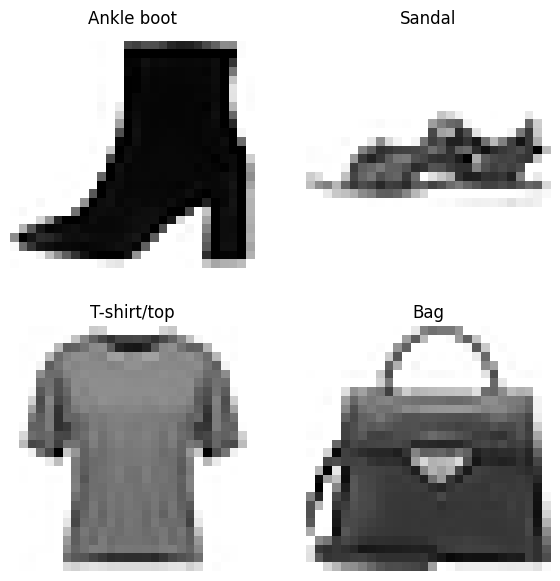

In [14]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [15]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [16]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
}

model = CapsNet(**params)
model._name = "CapsNet-Fashion-MNIST"
model.compile()
model.summary()

Model: "CapsNet-Fashion-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
 dense_3 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'])

Epoch 10/10: 100%|██████████| 16/16 [00:05<00:00,  2.67it/s, Loss : 0.0015]


{'accuracy': ListWrapper([0.6416015625, 0.765625, 0.7900390625, 0.8173828125, 0.8369140625, 0.859375, 0.857421875, 0.90234375, 0.9091796875, 0.92578125]),
 'precision': ListWrapper([0.6966887444295706, 0.7742309744318403, 0.7920188638087765, 0.8261325909010979, 0.8421090164110148, 0.864877933880458, 0.8724656663311818, 0.9035622874555708, 0.9104250912278528, 0.9259272911376403]),
 'recall': ListWrapper([0.6416015625, 0.765625, 0.7900390625, 0.8173828125, 0.8369140625, 0.859375, 0.857421875, 0.90234375, 0.9091796875, 0.92578125]),
 'f1': ListWrapper([0.6087464953054312, 0.7575898590825266, 0.7862347379626592, 0.8110515830052191, 0.8374492194573523, 0.8538070162135298, 0.8506046830065005, 0.9017836302048909, 0.9080167027591303, 0.9249596069352718]),
 'loss': ListWrapper([0.00885696243494749, 0.003933942876756191, 0.002919217571616173, 0.002570708282291889, 0.0022709304466843605, 0.002105632796883583, 0.001873914385214448, 0.001736334408633411, 0.001590014435350895, 0.0014595621032640338]

In [18]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/CapsNet-Fashion-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-Fashion-MNIST/assets


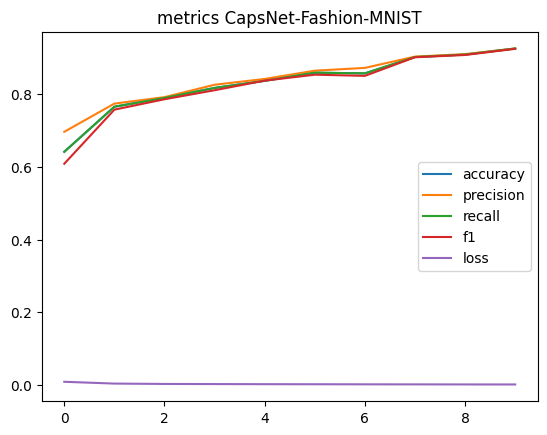

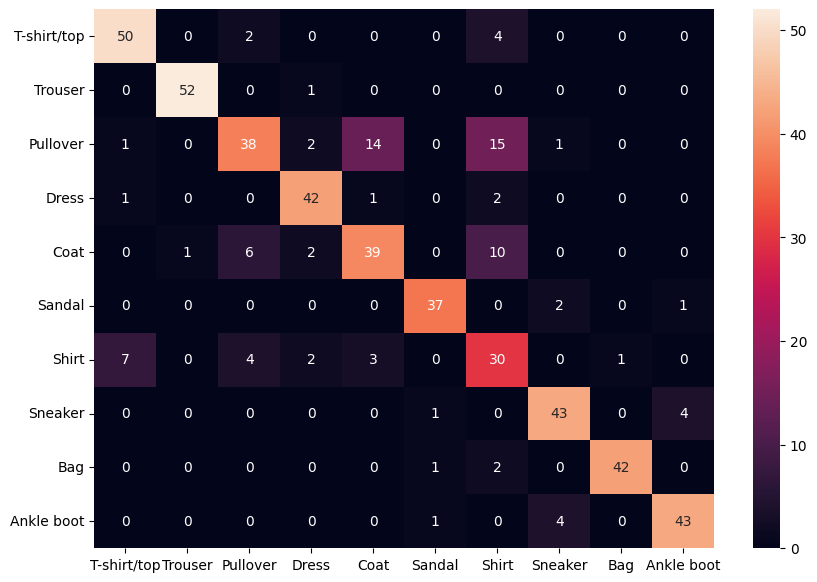

In [19]:
model.save(evaluate=(X_test, y_test), classes=class_names)

In [20]:
loaded_model = tf.keras.models.load_model('../saved_models/caps_net-Fashion-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense (Dense)               multiple                  82432     
                                                                 
 dense_1 (Dense)             multiple                  525312    
                                                                 
 dense_2 (Dense)             multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
